# Insall dependencies


pip install git+https://jugit.fz-juelich.de/inm-1/bda/software/data_processing/pli-transforms.git


pip install git+https://jugit.fz-juelich.de/inm-1/bda/software/data_processing/pli-styles


# Vis transform PLI

In [3]:
# Load test data from disk
import matplotlib.pyplot as plt
import numpy as np
import os
import tqdm
import h5py
from PIL import Image
import napari
from pathlib import Path
from pli_transforms.utils.data import load_transmittance, load_direction, load_retardation


path = Path('PE-2025-01953-M_00_s0060_PM_Complete_Transmittance_Stitched_Flat_v000.h5')
fullpath = Path.cwd().parent.parent/f'data/{path}'
File = h5py.File(fullpath)
ntransmittance = np.array(File["Image"])[1000:3000, 800:2800]
ntransmittance.shape

(2000, 2000)

In [2]:
from pli_transforms.utils.data import load_transmittance, load_direction, load_retardation
from pathlib import Path

path = Path('PE-2025-01953-M_00_s0060_PM_Complete_Transmittance_Stitched_Flat_v000.h5')
fullpath = Path.cwd().parent.parent/f'data/{path}'

ntransmittance = load_transmittance(fullpath) # , normalize=True

KeyError: "Unable to synchronously open attribute (can't locate attribute: 'normalization_value')"

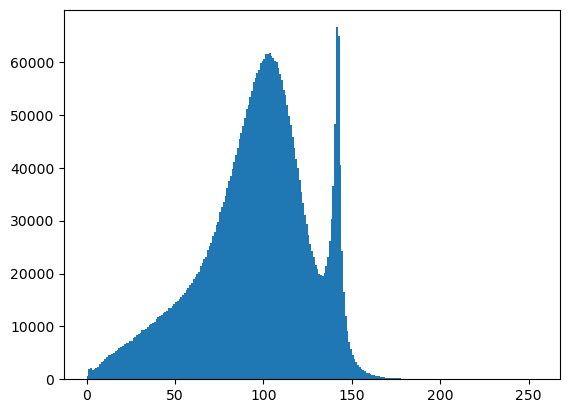

In [11]:
def normalize(image):
    max, min = (np.max(image), np.min(image))
    return (image - min)/(max - min)*255

norm_trans = normalize(ntransmittance)
plt.hist(norm_trans.ravel(), bins = 255)
plt.show()

In [12]:
# Define transformations to visualize

import cv2

import pli_transforms.augmentations as aug

transform_list = [
    aug.AffinePLI(
        scale = {"x": (0.9, 1.2), "y": (0.9, 1.2)},
        rotate = (-90, 90),
        shear = {"x": (-25, 35), "y": (-25, 35)},
        always_apply=True
    ),
    aug.ScaleAttenuationPLI(
        log_range=(-1.0, -1.0),
        trans_max=1.0,
        clip_max=1.5,
        always_apply=True
    ),
    aug.ScaleThicknessPLI(
        log_range=(1.0, 1.0),
        trans_max=1.0,
        clip_max=1.5,
        always_apply=True
    ),
    aug.BlurPLI(
        blur_limit=(25, 25),
        sigma_limit=(0, 0),
        always_apply=True
    ),
    aug.RandomFlipPLI(
        always_apply=True
    ),
    aug.RandomRotatePLI(
        limit=(-45, -45),
        interpolation=cv2.INTER_LINEAR,
        border_mode=cv2.BORDER_CONSTANT, value=0,
        always_apply=True
    ),
]

In [13]:
outs = []
names = []

for i, t in enumerate(transform_list):
    out = t(pli_dict={'trans': norm_trans})['pli_dict']
    name = type(t).__name__
    outs.append(out)
    names.append(name)

TypeError: '>=' not supported between instances of 'NoneType' and 'int'